In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller



In [84]:
data = pd.read_csv('/Users/Bakso/Documents/git/604Final/data/daily_data.csv')

In [86]:
data['station'].unique()

array(['72202', '72243', '72278', '72290', '72327', '72353', '72405',
       '72494', '72530', '72565', '72572', '72606', '72681', '72698',
       '72793', '74486', '91182', 'KARB0', 'KMIC0', 'KYIP0', 'PALH0'],
      dtype=object)

In [71]:
print(data.isna().sum())

rows_with_missing_values = data[data.isna().any(axis=1)]

print(rows_with_missing_values)

data.dropna(inplace = True)

station      0
date         0
temp_max     7
temp_mean    7
temp_min     7
rainfall     0
snow         0
dtype: int64
      station        date  temp_max  temp_mean  temp_min  rainfall   snow
62821   KARB0  2015-12-23       NaN        NaN       NaN      True  False
62822   KARB0  2015-12-24       NaN        NaN       NaN      True  False
64128   KARB0  2019-07-22       NaN        NaN       NaN     False  False
73841   PALH0  2016-02-22       NaN        NaN       NaN      True  False
73842   PALH0  2016-02-23       NaN        NaN       NaN     False  False
73843   PALH0  2016-02-24       NaN        NaN       NaN     False  False
73844   PALH0  2016-02-25       NaN        NaN       NaN     False  False


In [72]:
data['date'] = pd.to_datetime(data['date'])

latest_date = data['date'].max()

date_years_ago = latest_date - pd.DateOffset(years=5)

data_last_years = data[data['date'] >= date_years_ago]

In [97]:
import pandas as pd

# Define the column names
column_names = ['date', 'temp_mean', 'temp_min', 'temp_max']

# Create an empty DataFrame with the specified column names
df = pd.DataFrame(columns=column_names)

# Find the latest date in the existing data (assuming it already exists)
latest_date = data['date'].max() 
latest_date = pd.to_datetime(latest_date)
date_range = pd.date_range(start=latest_date + pd.DateOffset(days=1), periods=10, freq='D')

# Fill the 'date' column with the next 10 dates
df['date'] = date_range

# Print the resulting DataFrame
print(df)


        date temp_mean temp_min temp_max
0 2023-11-23       NaN      NaN      NaN
1 2023-11-24       NaN      NaN      NaN
2 2023-11-25       NaN      NaN      NaN
3 2023-11-26       NaN      NaN      NaN
4 2023-11-27       NaN      NaN      NaN
5 2023-11-28       NaN      NaN      NaN
6 2023-11-29       NaN      NaN      NaN
7 2023-11-30       NaN      NaN      NaN
8 2023-12-01       NaN      NaN      NaN
9 2023-12-02       NaN      NaN      NaN


In [91]:
df = data
latest_date = df['date'].max() 
latest_date 

'2023-11-22'

In [6]:
data1 = data.loc[data['station'] == 'KARB0'].reset_index()

data2 = data_last_years.loc[data_last_years['station'] == 'KARB0'].reset_index()

In [7]:
split_index = len(data1) - 10

train_data = data1[:split_index]
test_data = data1[split_index:]

In [19]:
train_data.reset_index()
test_data.reset_index()

0      2013-11-22
1      2013-11-23
2      2013-11-24
3      2013-11-25
4      2013-11-26
          ...    
3634   2023-11-08
3635   2023-11-09
3636   2023-11-10
3637   2023-11-11
3638   2023-11-12
Name: date, Length: 3639, dtype: datetime64[ns]

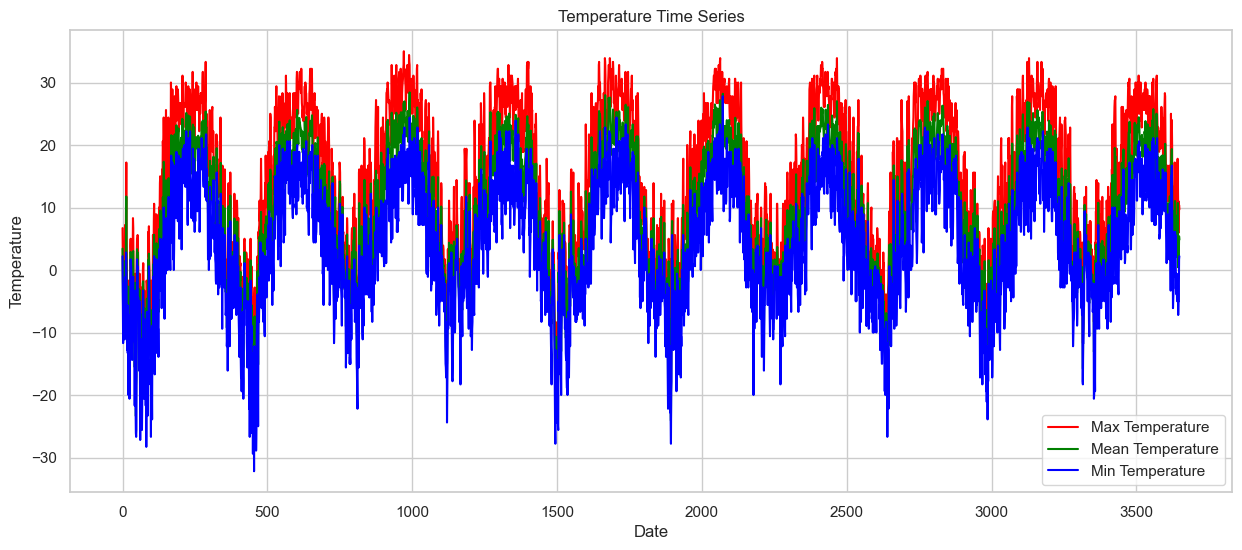

In [100]:
sns.set(style="whitegrid")

# Temperature time series plot
plt.figure(figsize=(15, 6))
plt.plot(data1['temp_max'], label='Max Temperature', color='red')
plt.plot(data1['temp_mean'], label='Mean Temperature', color='green')
plt.plot(data1['temp_min'], label='Min Temperature', color='blue')
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.savefig('eda1.png')

## Implementing SARIMA Model 

### Check for Stationarity 

In [15]:
result = adfuller(data1['temp_mean']) 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.262628
p-value: 0.016634


In [14]:
result = adfuller(data2['temp_mean']) 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.584984
p-value: 0.096141


### Check for Seasonality

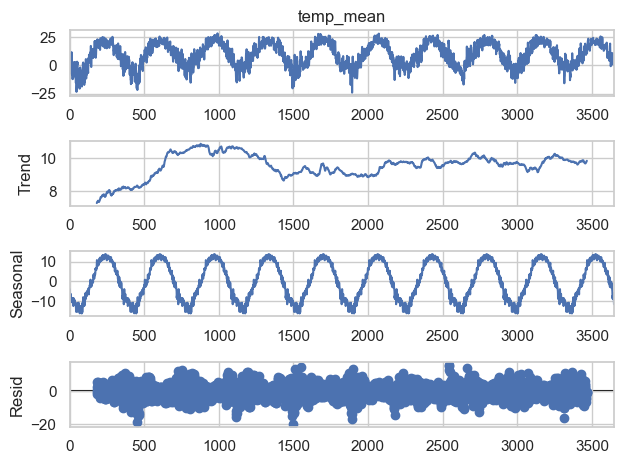

In [102]:
decomposition = seasonal_decompose(data1['temp_mean'], model='additive', period = 365)  
decomposition.plot()
plt.savefig('seasonal_decom.png')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = 1, 0, 1  # Non-seasonal params
P, D, Q, s = 1, 1, 1, 360  # Seasonal params


sarima_model_temp_mean = SARIMAX(data1['temp_mean'],
                                 order=(p, d, q), seasonal_order = (P, D, Q, s))
                                

sarima_fit_temp_mean = sarima_model_temp_mean.fit()

predictions_temp_mean = sarima_fit_temp_mean.get_forecast(steps=10)
predicted_means = predictions_temp_mean.predicted_mean
predicted_means

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


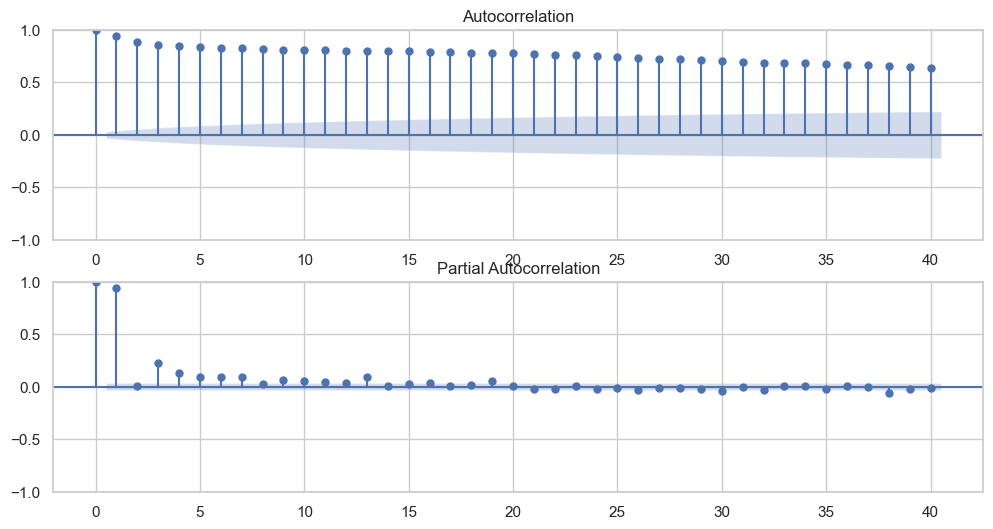

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Generate ACF and PACF plots for 'temp_mean'
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(train_data['temp_mean'], ax=plt.gca(), lags=40)  
plt.subplot(212)
plot_pacf(train_data['temp_mean'], ax=plt.gca(), lags=40)  
plt.show()


In [ ]:
from pmdarima import auto_arima

model = auto_arima(train_data['temp_mean'], seasonal=True, m=365, trace=True)

print(model.summary())

Performing stepwise search to minimize aic


In [12]:
def optimize_ARIMA(order_list, exog):

    results = []
    
    for order in tqdm_notebook(order_list):
        model = SARIMAX(exog, order=order).fit(disp=-1)
        aic = model.aic
        results.append([order, model.aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
from itertools import product
from tqdm import tqdm_notebook

ps = range(0, 5, 1)
d = 0
qs = range(1, 20, 2)

parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_0 = optimize_ARIMA(order_list, exog = train_data['temp_mean'])

In [83]:
np.array(result_d_0['(p, d, q)'])[0]

(4, 0, 11)

In [15]:
# best_model_0 = SARIMAX(data1['temp_mean'], order= (1, 0, 1), seasonal_order=(1, 1, 1, 365)).fit()
best_model_0 = SARIMAX(train_data['temp_mean'], order= (2, 0, 13)).fit()
print(best_model_0.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62654D+00    |proj g|=  2.13781D-02

At iterate    5    f=  2.62587D+00    |proj g|=  2.58686D-03

At iterate   10    f=  2.62568D+00    |proj g|=  6.91517D-03

At iterate   15    f=  2.62538D+00    |proj g|=  2.69085D-04

At iterate   20    f=  2.62538D+00    |proj g|=  1.90989D-04

At iterate   25    f=  2.62532D+00    |proj g|=  4.08420D-03

At iterate   30    f=  2.62425D+00    |proj g|=  1.02626D-02

At iterate   35    f=  2.62265D+00    |proj g|=  8.63986D-03

At iterate   40    f=  2.62198D+00    |proj g|=  3.21430D-03

At iterate   45    f=  2.62076D+00    |proj g|=  2.25105D-03


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.62010D+00    |proj g|=  4.14930D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     54      1     0     0   4.149D-03   2.620D+00
  F =   2.6200981847517704     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                               SARIMAX Results                                
Dep. Variable:              temp_mean   No. Observations:                 3639
Model:              SARIMAX(2, 0, 13)   Log Likelihood               -9534.537
Date:                Tue, 28 Nov 2023   AIC                          19101.075
Time:                        00:35:38   BIC  

In [34]:
test_mean_temp = test_data['temp_mean']


predictions = np.array(best_model_0.forecast(steps=len(test_mean_temp)))


rmse = np.sqrt(mean_squared_error(np.array(test_mean_temp), predictions))
rmse

2.9200100335224795

In [35]:
predictions

array([3.33817299, 4.44930696, 4.13971271, 4.20155719, 4.1712976 ,
       4.02364708, 3.57798858, 3.86097245, 3.36065502, 3.43632959])

In [25]:
test_data

,index,station,date,temp_max,temp_mean,temp_min,rainfall,snow
3639,65703,KARB0,2023-11-13,15.6,6.687500,-0.6,False,False
3640,65704,KARB0,2023-11-14,11.7,3.441667,-5.0,False,False
3641,65705,KARB0,2023-11-15,16.7,3.600000,-5.0,False,False
3642,65706,KARB0,2023-11-16,17.8,6.062500,-2.8,False,False
3643,65707,KARB0,2023-11-17,14.0,10.712500,-1.1,True,False
3644,65708,KARB0,2023-11-18,10.0,0.420833,-7.2,False,False
3645,65709,KARB0,2023-11-19,11.0,2.129167,-5.0,False,False
3646,65710,KARB0,2023-11-20,6.0,1.570833,-5.0,False,False
3647,65711,KARB0,2023-11-21,10.4,5.395833,1.7,True,False
3648,65712,KARB0,2023-11-22,9.7,4.858824,2.2,True,False


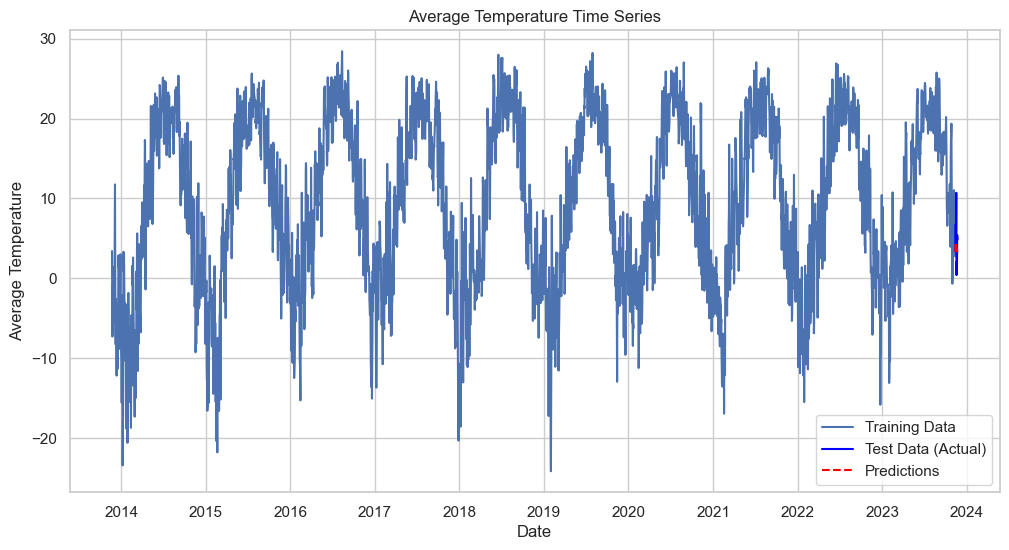

In [23]:
train_dates = train_data['date']
test_dates = test_data['date']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_dates, train_data['temp_mean'], label='Training Data')
plt.plot(test_dates, test_mean_temp, label='Test Data (Actual)', color='blue')
plt.plot(test_dates, predictions, label='Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Time Series')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
from itertools import product
from tqdm import tqdm_notebook

ps = range(0, 5, 1)
d = 0
qs = range(1, 20, 2)

parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_1 = optimize_ARIMA(order_list, exog = train_data['temp_min'])

/var/folders/83/l90nsr955zzdy6yv_p2ch0680000gr/T/ipykernel_81292/3394143862.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/50 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model

In [28]:
result_d_1.head()

,"(p, d, q)",AIC
0,"(4, 0, 11)",21436.037747
1,"(3, 0, 15)",21449.464590
2,"(4, 0, 15)",21453.455061
3,"(3, 0, 11)",21454.378034
4,"(3, 0, 17)",21461.172490


In [29]:
best_model_1 = SARIMAX(train_data['temp_min'], order= (4, 0, 11)).fit()
print(best_model_1.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95247D+00    |proj g|=  1.50892D-02

At iterate    5    f=  2.95203D+00    |proj g|=  9.00948D-04

At iterate   10    f=  2.95199D+00    |proj g|=  1.69265D-03

At iterate   15    f=  2.95186D+00    |proj g|=  4.17761D-03

At iterate   20    f=  2.95180D+00    |proj g|=  2.39184D-03

At iterate   25    f=  2.95106D+00    |proj g|=  7.26405D-03

At iterate   30    f=  2.95000D+00    |proj g|=  7.14108D-03

At iterate   35    f=  2.94710D+00    |proj g|=  1.39038D-02

At iterate   40    f=  2.94391D+00    |proj g|=  5.10598D-03

At iterate   45    f=  2.94256D+00    |proj g|=  9.90771D-03


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.94092D+00    |proj g|=  4.12743D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     60      1     0     0   4.127D-03   2.941D+00
  F =   2.9409230209939641     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                               SARIMAX Results                                
Dep. Variable:               temp_min   No. Observations:                 3639
Model:              SARIMAX(4, 0, 11)   Log Likelihood              -10702.019
Date:                Tue, 28 Nov 2023   AIC                          21436.038
Time:                        00:56:27   BIC  

In [30]:
test_min_temp = test_data['temp_min']


predictions = np.array(best_model_1.forecast(steps=len(test_min_temp)))


rmse = np.sqrt(mean_squared_error(np.array(test_min_temp), predictions))
rmse

3.6745663532925543

In [31]:
predictions

array([-1.96092288, -0.63640148, -1.0763145 , -0.55483012, -1.33404077,
       -0.81890101, -1.31475741, -1.1276389 , -1.4912959 , -1.56316591])

In [33]:
test_data['temp_min']

3639   -0.6
3640   -5.0
3641   -5.0
3642   -2.8
3643   -1.1
3644   -7.2
3645   -5.0
3646   -5.0
3647    1.7
3648    2.2
Name: temp_min, dtype: float64

### Taking only Nov-Dec data

In [36]:
data['date'] = pd.to_datetime(data['date'])
data = data.loc[data['station'] == 'KARB0']

od_data = data[(data['date'].dt.year >= 2014) & (data['date'].dt.month >= 10) & ((data['date'].dt.month < 12) | ((data['date'].dt.month == 12) & (data['date'].dt.day <= 12)))]

In [37]:
od_data[od_data['date'].dt.year == 2022]

,station,date,temp_max,temp_mean,temp_min,rainfall,snow
65295,KARB0,2022-10-01,21.1,13.125000,5.0,False,False
65296,KARB0,2022-10-02,18.3,14.604167,11.7,False,False
65297,KARB0,2022-10-03,18.3,10.362500,0.0,False,False
65298,KARB0,2022-10-04,21.7,10.158333,0.0,False,False
65299,KARB0,2022-10-05,23.3,12.695833,3.9,False,False
...,...,...,...,...,...,...,...
65363,KARB0,2022-12-08,7.2,4.266667,2.8,False,False
65364,KARB0,2022-12-09,3.3,0.583333,-2.8,False,False
65365,KARB0,2022-12-10,1.7,0.820833,0.0,True,False
65366,KARB0,2022-12-11,4.4,2.204167,0.6,False,False


In [65]:
variable = 'temp_mean'

# Test data: December 4-12, 2023
start_test_date = pd.to_datetime('2023-11-04')
end_test_date = pd.to_datetime('2023-11-14')

train_data = np.array(od_data[od_data['date'] < start_test_date][variable])
test_data = np.array(od_data[(od_data['date'] >= start_test_date) & (od_data['date'] <= end_test_date)][variable])

# order = (1, 1, 1)
# seasonal_order = (1, 1, 1, 12)

# sarima_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
# sarima_results = sarima_model.fit()

# predictions = sarima_results.predict(start=start_test_date, end=end_test_date)

# predictions 


In [66]:
test_data

array([ 9.45416667,  6.16666667,  9.02916667, 11.0375    ,  4.3       ,
        8.75      ,  4.49166667,  4.4125    ,  2.76666667,  6.6875    ,
        3.44166667])

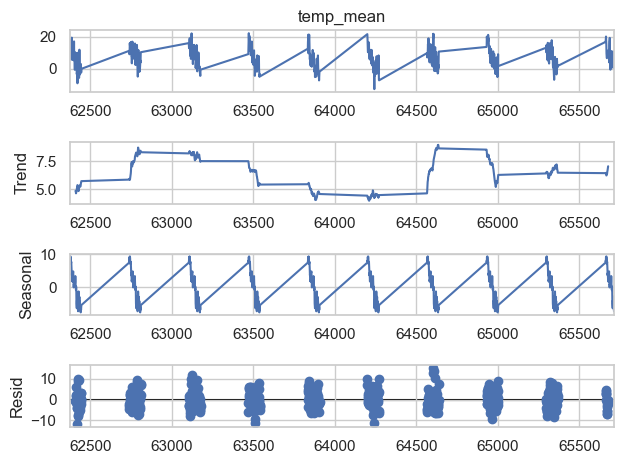

In [43]:
decomposition = seasonal_decompose(train_data, model='additive', period = 73)  
decomposition.plot()
plt.show()

In [44]:
result = adfuller(train_data) 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.835834
p-value: 0.000000


In [ ]:
from pmdarima import auto_arima

model = auto_arima(train_data, seasonal=True, m=73, trace=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[73] intercept   : AIC=inf, Time=43.41 sec
 ARIMA(0,0,0)(0,0,0)[73] intercept   : AIC=4653.996, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[73] intercept   : AIC=3972.292, Time=6.21 sec
 ARIMA(0,0,1)(0,0,1)[73] intercept   : AIC=4159.059, Time=12.07 sec
 ARIMA(0,0,0)(0,0,0)[73]             : AIC=5155.242, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[73] intercept   : AIC=3988.958, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[73] intercept   : AIC=3966.461, Time=37.93 sec
 ARIMA(1,0,0)(2,0,1)[73] intercept   : AIC=inf, Time=147.45 sec
 ARIMA(1,0,0)(1,0,1)[73] intercept   : AIC=inf, Time=27.15 sec
 ARIMA(0,0,0)(2,0,0)[73] intercept   : AIC=inf, Time=34.42 sec
 ARIMA(2,0,0)(2,0,0)[73] intercept   : AIC=3967.939, Time=49.34 sec
 ARIMA(1,0,1)(2,0,0)[73] intercept   : AIC=3967.761, Time=45.51 sec
 ARIMA(0,0,1)(2,0,0)[73] intercept   : AIC=4089.763, Time=55.18 sec
 ARIMA(2,0,1)(2,0,0)[73] intercept   : AIC=3965.297, Time=133.14 sec
 ARIMA(2,0,1)(1,0,0)[73] in

In [68]:
nd_model = SARIMAX(train_data, order= (2, 0, 2), seasonal_order = (1,1,1,73)).fit()
print(nd_model.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80745D+00    |proj g|=  6.31276D-01


 This problem is unconstrained.



At iterate    5    f=  2.55191D+00    |proj g|=  8.10995D-02

At iterate   10    f=  2.53175D+00    |proj g|=  1.31290D-02

At iterate   15    f=  2.52979D+00    |proj g|=  4.14190D-03

At iterate   20    f=  2.52935D+00    |proj g|=  1.76988D-03

At iterate   25    f=  2.52913D+00    |proj g|=  2.17620D-03

At iterate   30    f=  2.52900D+00    |proj g|=  7.94561D-04

At iterate   35    f=  2.52899D+00    |proj g|=  4.95863D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     41      1     0     0   1.004D-05   2.529D+00
  F =   2.5289892018780096     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

In [69]:
predictions = np.array(nd_model.forecast(steps=len(test_data)))


rmse = np.sqrt(mean_squared_error(np.array(test_data), predictions))
rmse

3.0830622695750125